# Background


The MEXT, a section of the government in Japan, has been taking a survey about English education in Japan. This annual survey involves all public elementary, junior high, and senior high schools in Japan, totaling over 20,000 samples. The data is grouped into 47 prefectures (=rows) and the surveyed items include questions about the state of English education, such as the rate of students holding a language proficiency certificate and the average duration of in-class English usage by teachers and students. \
However, a significant issue with this survey is that the large-scale dataset, collected with such a considerable effort and time, has almost never been thoroughly analyzed with statistical methods. Moreover, it is supposed to serve as ‘evidence’ for educational policy making. Concerned about this problematic situation, I conducted projects to analyze this data and submitted my findings to a data science competition. Btw, I’m going to participate in the competition this year too. The competition requires the use of a dataset called SSDSE, which includes various social statistics of Japan. But the large number of columns makes it challenging to gain easily understandable insight. It appears that the government is also seeking ways to use this messy data productively. \
So, specifically in this project, I’m going to apply PCA methods to extract hopefully 2 or 3 meaningful components from the dataset. Then I will run k-means clustering to create labels that might reflect some regional features.


# Setup


In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# from sklearn.linear_model import LinearRegression
# import statsmodels.api as sm


In [2]:
# Mounting gdrive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Load the data (xlsx format)
excel_file = '/content/drive/MyDrive/Edu/MSDS/_5510Unsupervised/Final/EngEdu_SSDSE_datasets.xlsx'
xlsx = pd.ExcelFile(excel_file)

# Display sheet names
print(xlsx.sheet_names)

# Load a specific sheet into a DataFrame
df_1 = pd.read_excel(excel_file, sheet_name='EngEdu')
df_2 = pd.read_excel(excel_file, sheet_name='SSDSE-D_2') # SSDSE-D_1 holds the original column names (in Japanese)

# Convert the 'Prefecture' values as row names
df_2.set_index('Prefecture', inplace=True)

# Merge the data frames on the "Prefecture" column
merged_df = pd.merge(df_1, df_2, on='Prefecture')
merged_df.set_index('Prefecture', inplace=True)

# Display the merged DataFrame
df_2.head()

['EngEdu', 'SSDSE-D_1', 'SSDSE-D_2', 'Sheet_cut', 'Sheet_raw']


,MA00,MB00,MB01,MB011,MB012,MB02,MB021,MB022,MB03,MB04,...,MG14,MG15,MG16,MG17,MG18,MG19,MG20,MG51,MG52,MG53
Prefecture,,,,,,,,,,,,,,,,,,,,,
Hokkaido,4614,35.0,11.1,9.9,3.3,17.0,14.1,6.7,4.1,13.3,...,10,48,11,2,10,7,15,64,343,391
Aomiri,1090,25.4,7.4,6.6,2.0,12.7,10.3,5.2,2.5,8.9,...,6,42,9,1,8,8,12,61,370,423
Iwate,1075,28.9,7.7,7.1,2.4,12.8,10.3,5.4,3.0,10.5,...,8,40,11,2,7,6,17,63,362,472
Miyagi,2065,37.5,12.4,10.9,4.0,18.9,16.0,7.4,3.1,13.8,...,9,53,12,2,10,7,16,73,352,395
Akita,849,29.2,7.4,6.8,1.8,13.6,11.4,5.7,2.7,11.7,...,9,44,10,2,9,9,14,60,340,424


When you have multiple datasets of interest, you can switch the data in the cell below, and run the rest of the code.

In [4]:
# Set/Switch the data object to analyze
df_set = df_2

# EDA

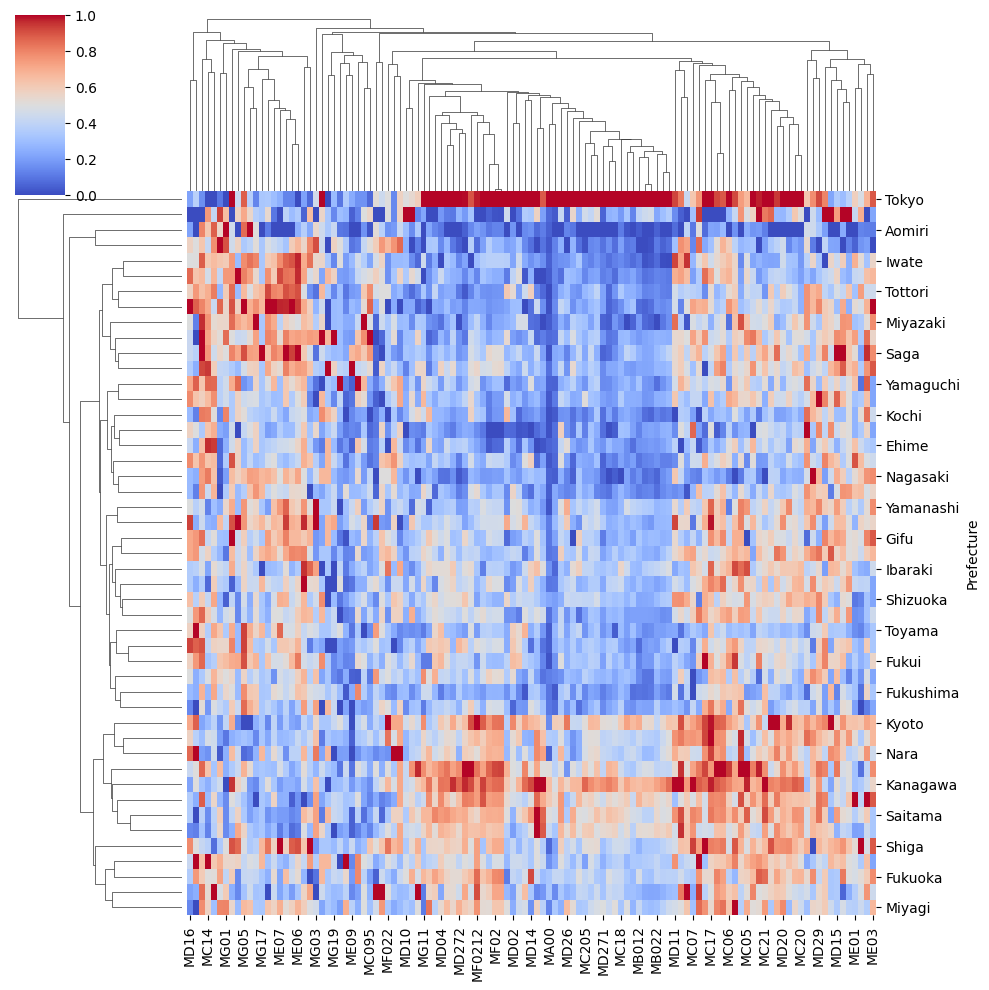

In [5]:
# Create a clustered heatmap with a hyerachical clustering tree
sns.clustermap(df_set, cmap='coolwarm', standard_scale=1)

# Display the plot
plt.show()

# PCA approach

## Demensionality reduction

In [6]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_set) # set df to applu PCA

# Initialize PCA for demensionality reduction
pca = PCA(n_components=0.8) # Set the cumulative explained variance rate
principalComponents = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
principalDf = pd.DataFrame(data = principalComponents)

# Explained variance and cumulative explained variance
explained_variance = np.round(pca.explained_variance_ratio_, 4)
cumulative_explained_variance = np.round(np.cumsum(explained_variance), 4)

# Print number of components, explained variance, and cumulative explained variance
print("Number of components:", pca.n_components_)
print("Explained Variance Ratio:", explained_variance)
print("Cumulative Explained Variance:", cumulative_explained_variance)

Number of components: 13
Explained Variance Ratio: [0.3875 0.087  0.0597 0.0499 0.039  0.0347 0.0285 0.0239 0.0235 0.021
 0.0197 0.0171 0.0162]
Cumulative Explained Variance: [0.3875 0.4745 0.5342 0.5841 0.6231 0.6578 0.6863 0.7102 0.7337 0.7547
 0.7744 0.7915 0.8077]


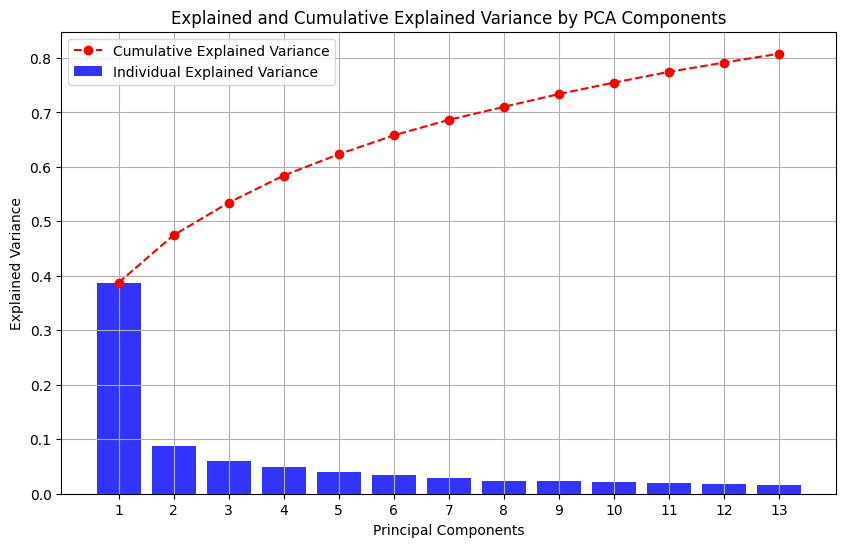

In [7]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart for explained variance
ax.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.8, label='Individual Explained Variance', color='b')

# Line graph for cumulative explained variance
ax.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, label='Cumulative Explained Variance', marker='o', color='r', linestyle='--')

# Labels and Title
ax.set_xlabel('Principal Components')
ax.set_ylabel('Explained Variance')
ax.set_title('Explained and Cumulative Explained Variance by PCA Components')

# Ticks and Grid
ax.set_xticks(range(1, len(cumulative_explained_variance) + 1))
ax.grid(True)

# Legend
ax.legend()

plt.show()

The 115 columns were converted into PCA components. Unfortunately, however, the number of effective components appears to be only one, despite our hopes for more meaningful structures with 2 or 3 components. \

Practically speaking, I would conclude that the original statistics did not have any structural information that could be revealed by the PCA method. However, out of interest and for the benefit of our future work, I would like to continue coding.

## PCA scores & Factor Loadings

In [8]:
# PCA with 2 components
pca = PCA(n_components=2)  # You can change the number of components
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, index=df_set.index, columns=['PC1', 'PC2'])

# Display the PCA DataFrame
print(pca_df)

                  PC1       PC2
Prefecture                     
Hokkaido     1.868702  2.903767
Aomiri     -12.325146  9.665579
Iwate       -7.189251 -2.398762
Miyagi       3.053380 -0.676891
Akita       -7.942107  3.470866
Yamagata    -6.028115 -2.919918
Fukushima   -5.752076  1.977160
Ibaraki      2.377046  1.996653
Tochigi     -2.361351  4.177011
Gunma        0.686176  0.892912
Saitama      9.800349  2.576763
Chiba        7.739091  4.664709
Tokyo       23.114243  0.638920
Kanagawa    15.527658  1.175571
Niigata     -1.745988  3.330321
Toyama      -4.036471  1.776504
Ishikawa    -0.979588 -0.072663
Fukui       -0.968941 -1.903070
Yamanashi    0.149202 -1.969958
Nagano       0.250306 -4.052858
Gifu        -0.998293 -2.808973
Shizuoka     1.147426  1.001204
Aichi       10.032289  0.436978
Mie         -0.551439  0.644668
Shiga        4.766116 -5.854020
Kyoto       10.901306 -0.847349
Osaka        9.552433  1.672701
Hyogo        5.621762  0.786748
Nara         4.821360  0.447215
Wakayama

            PC1       PC2
MA00   0.870556  0.228420
MB00   0.960902 -0.124554
MB01   0.944103  0.054505
MB011  0.934206  0.051537
MB012  0.919822  0.027982
...         ...       ...
MG19  -0.167325 -0.122992
MG20  -0.026632 -0.310488
MG51   0.864243  0.171512
MG52  -0.617298 -0.082702
MG53  -0.730749 -0.405708

[115 rows x 2 columns]


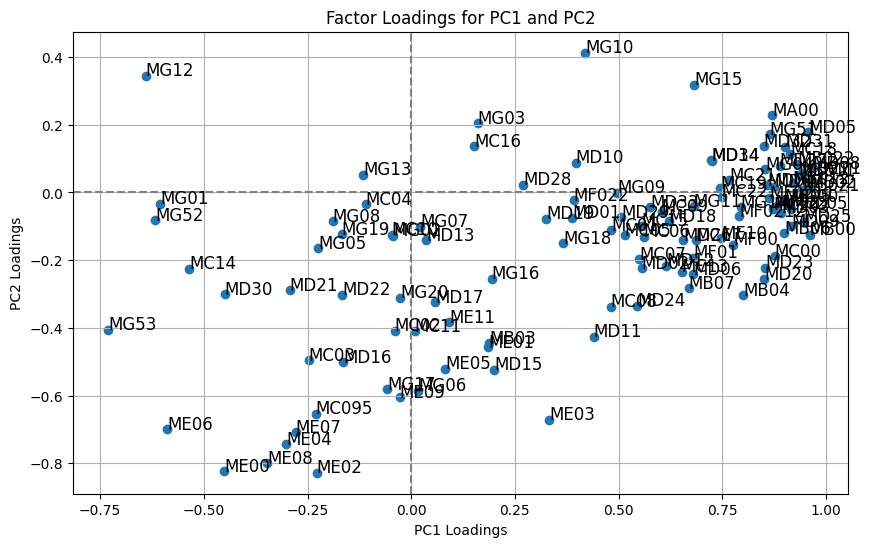

In [9]:
# Extract the factor loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for the factor loadings
loadings_df = pd.DataFrame(loadings, index=df_set.columns, columns=['PC1', 'PC2'])

# Display the factor loadings DataFrame
print(loadings_df)

# Visualize the factor loadings
plt.figure(figsize=(10, 6))
plt.scatter(loadings_df['PC1'], loadings_df['PC2'])
for i, txt in enumerate(loadings_df.index):
    plt.annotate(txt, (loadings_df['PC1'][i], loadings_df['PC2'][i]), fontsize=12)
plt.title('Factor Loadings for PC1 and PC2')
plt.xlabel('PC1 Loadings')
plt.ylabel('PC2 Loadings')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.show()

Factor Loadings:
             PC1       PC2
MA00   0.129009  0.071455
MB00   0.142398 -0.038963
MB01   0.139908  0.017050
MB011  0.138442  0.016122
MB012  0.136310  0.008753
...         ...       ...
MG19  -0.024796 -0.038474
MG20  -0.003947 -0.097127
MG51   0.128074  0.053652
MG52  -0.091478 -0.025871
MG53  -0.108291 -0.126914

[115 rows x 2 columns]


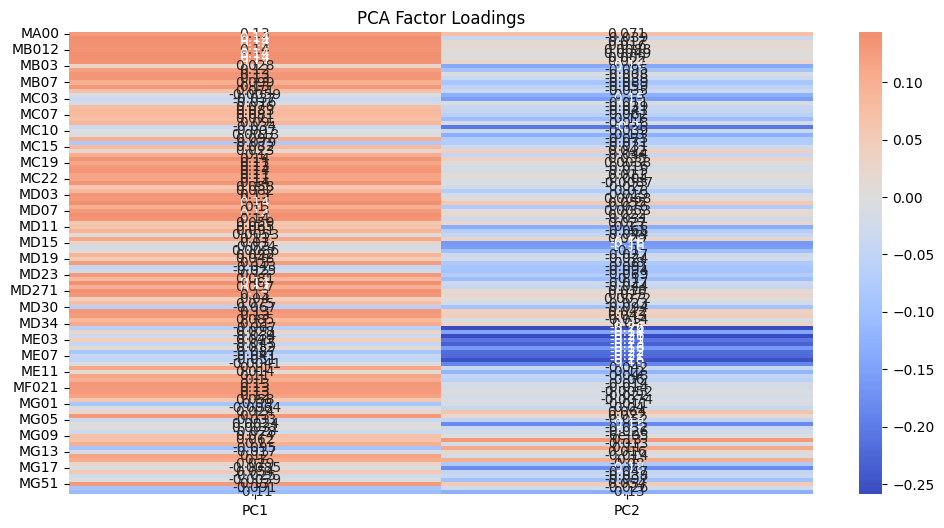

In [10]:
# Initialize the PCA settings
pca = PCA(n_components=2)  # Determine the number of PCs to adopt
principalComponents = pca.fit_transform(scaled_data)
principalDf = pd.DataFrame(data=principalComponents, index=df_set.index, columns=['PC1', 'PC2'])

# Extract factor loadings (components)
loadings = pca.components_

# Create a DataFrame with these loadings
loadings_df = pd.DataFrame(data=loadings.T, columns=[f"PC{i+1}" for i in range(loadings.shape[0])], index=df_set.columns)

# Print the loadings DataFrame
print("Factor Loadings:\n", loadings_df)

plt.figure(figsize=(12, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title("PCA Factor Loadings")
plt.show()

# k-means clustering (based on PCA scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


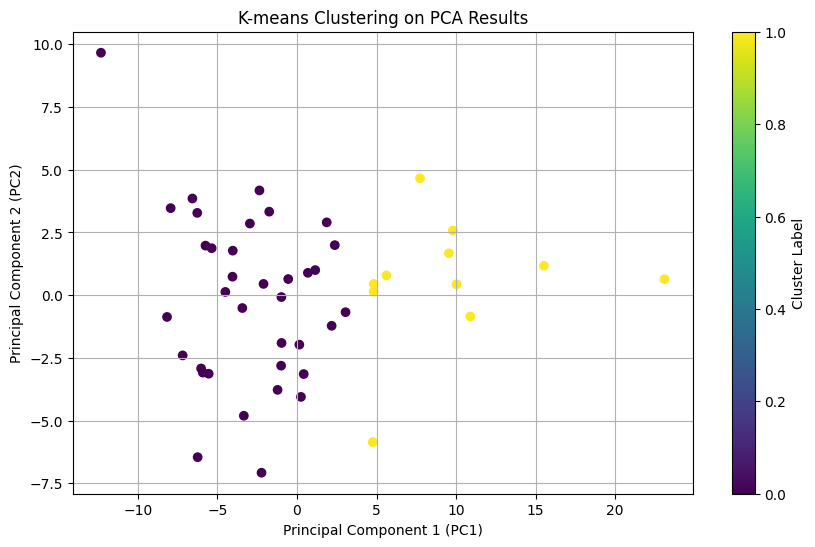

In [11]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # The number of clusters
kmeans.fit(pca_df)
labels = kmeans.labels_

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o')
plt.title('K-means Clustering on PCA Results')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

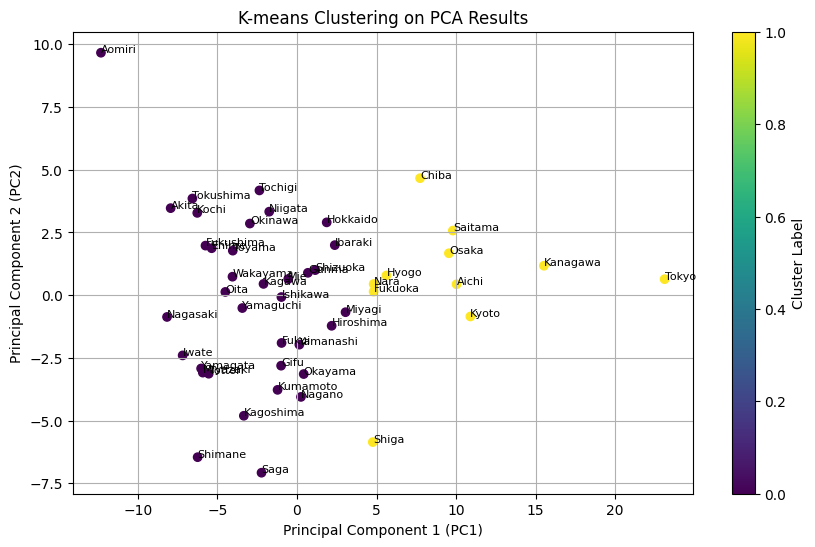

In [12]:
# Visualize the clusters with row names (Prefectures)
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o')
for i, row in pca_df.iterrows():
    plt.annotate(i, (row['PC1'], row['PC2']), fontsize=8)
plt.title('K-means Clustering on PCA Results')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

# Further analysis with the labels given by the US algorithm

In [13]:
# Add the cluster labels to the specified dataset
df_set['Cluster'] = labels

# Display the updated data frame
print(df_set)

             MA00  MB00  MB01  MB011  MB012  MB02  MB021  MB022  MB03  MB04  \
Prefecture                                                                    
Hokkaido     4614  35.0  11.1    9.9    3.3  17.0   14.1    6.7   4.1  13.3   
Aomiri       1090  25.4   7.4    6.6    2.0  12.7   10.3    5.2   2.5   8.9   
Iwate        1075  28.9   7.7    7.1    2.4  12.8   10.3    5.4   3.0  10.5   
Miyagi       2065  37.5  12.4   10.9    4.0  18.9   16.0    7.4   3.1  13.8   
Akita         849  29.2   7.4    6.8    1.8  13.6   11.4    5.7   2.7  11.7   
Yamagata      944  31.1   8.8    8.1    2.6  14.7   11.7    5.9   3.8  11.9   
Fukushima    1632  31.5   8.8    8.1    2.3  15.0   11.7    6.5   3.6  11.7   
Ibaraki      2572  36.5  13.2   12.3    3.3  20.0   16.6    8.2   2.8  12.8   
Tochigi      1730  32.8  10.8    9.7    3.0  16.8   13.6    7.9   2.5  11.0   
Gunma        1724  35.2  11.4   10.4    3.5  16.8   14.3    6.6   3.2  13.5   
Saitama      6622  40.0  13.6   12.3    4.2  20.7   

Now we've added the label to the dataset. If you have any theoretical interest, you can conduct further analysis like stratified EDA and linear regression.

# Links

My previous survey (thesis): https://www.nstac.go.jp/sys/files/sites/3/2023U5-shorei-03.pdf \
My previous survey (repository): https://github.com/Naomichi-K/EngEduSituation_Survey_2021- \
SSDSE dataset: https://www.nstac.go.jp/use/literacy/ssdse/